##Project Structure
* Introduction to VaR
* Data Collection
* Data Preprocessing
* Monte Carlo VaR
* Historical VaR
* Variance-Covariance VaR
* Comparison and Conclusion

## 1. Introduction to VaR
#### Value at Risk (VaR) is a statistical measure used to assess the risk of investment portfolios. It estimates the maximum potential loss over a specific time frame with a given confidence level.

## 2. Data Collection

In [14]:
import yfinance as yf
import pandas as pd

# List of tickers
stock_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']

# Fetch historical data
data = yf.download(stock_symbols, start='2020-01-01', end='2024-01-01')['Adj Close']

[*********************100%%**********************]  5 of 5 completed


## 3. Data Preprocessing

In [15]:
# Calculate daily returns
returns = data.pct_change().dropna()

## 4. Monte Carlo VaR

In [16]:
import numpy as np

In [17]:
def monte_carlo_var(returns, num_simulations=1000, confidence_level=0.95):
    mean = returns.mean()
    std_dev = returns.std()
    simulated_returns = np.random.normal(mean, std_dev, (num_simulations, returns.shape[1]))
    var = np.percentile(simulated_returns, (1 - confidence_level) * 100, axis=0)
    return var

mc_var = monte_carlo_var(returns)
print(f"Monte Carlo VaR at 95% confidence level:\n{mc_var}")

Monte Carlo VaR at 95% confidence level:
[-0.03536322 -0.03699104 -0.03385763 -0.0450361  -0.03135255]


## 5. Historical VaR

In [18]:
def historical_var(returns, confidence_level=0.95):
    var = returns.quantile(1 - confidence_level)
    return var

hist_var = historical_var(returns)
print(f"Historical VaR at 95% confidence level:\n{hist_var}")

Historical VaR at 95% confidence level:
Ticker
AAPL    -0.032405
AMZN    -0.035522
GOOGL   -0.032451
META    -0.041054
MSFT    -0.029482
Name: 0.050000000000000044, dtype: float64


## 6. Variance-Covariance VaR

In [19]:
def var_cov_var(returns, confidence_level=0.95):
    mean = returns.mean()
    cov_matrix = returns.cov()
    std_dev = np.sqrt(np.diag(cov_matrix))
    var = norm.ppf(1 - confidence_level, mean, std_dev)
    return var

from scipy.stats import norm

vc_var = var_cov_var(returns)
print(f"Variance-Covariance VaR at 95% confidence level:\n{vc_var}")

Variance-Covariance VaR at 95% confidence level:
[-0.03359537 -0.03830098 -0.03381249 -0.04750881 -0.03270021]


## 7. Comparison and Conclusion

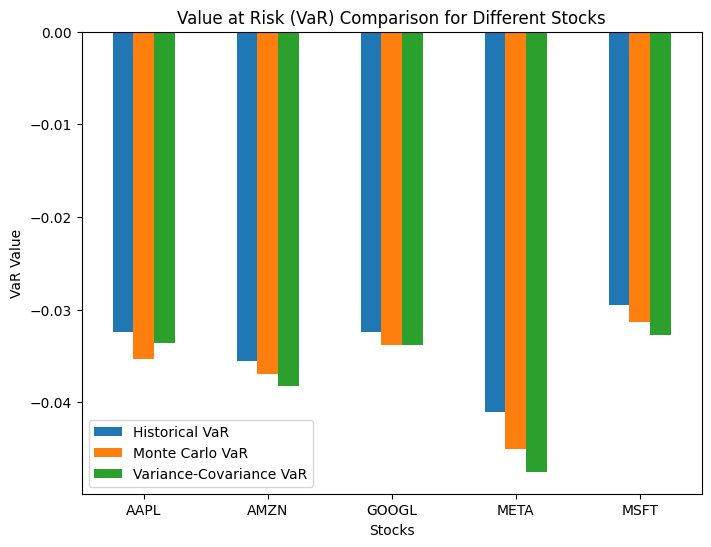

In [20]:
import matplotlib.pyplot as plt

methods = ['Historical VaR', 'Monte Carlo VaR', 'Variance-Covariance VaR']
vars = pd.DataFrame({
    'Historical VaR': hist_var,
    'Monte Carlo VaR': mc_var,
    'Variance-Covariance VaR': vc_var
})

vars.plot(kind='bar', figsize=(8, 6))
plt.title('Value at Risk (VaR) Comparison for Different Stocks')
plt.ylabel('VaR Value')
plt.xlabel('Stocks')
plt.xticks(rotation=0)
plt.show()

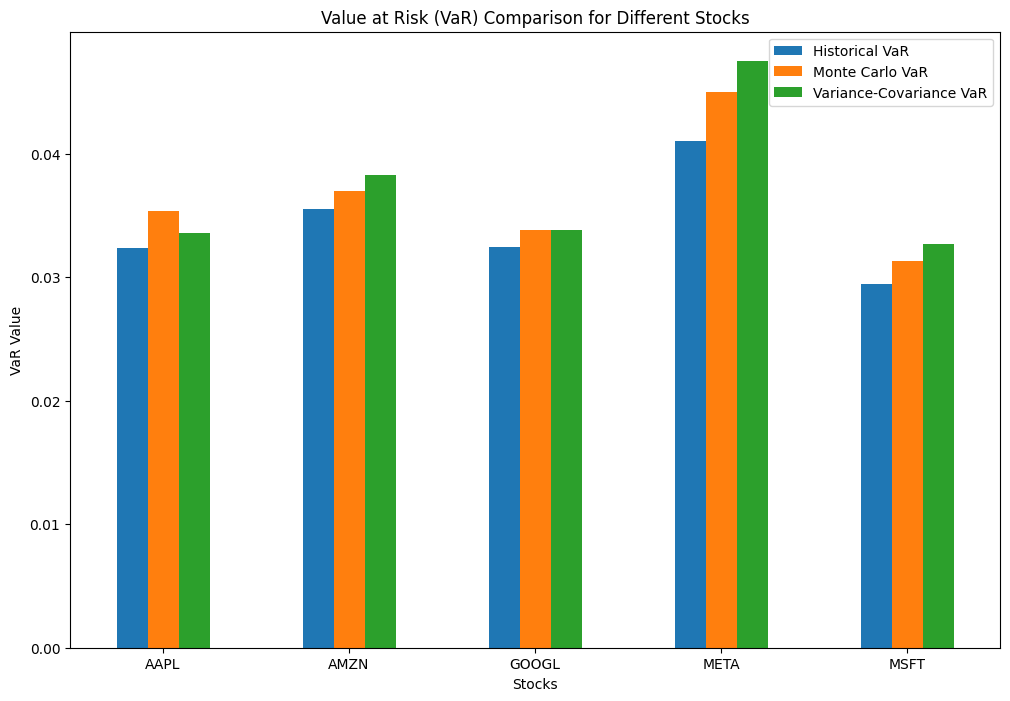

In [21]:
methods = ['Historical VaR', 'Monte Carlo VaR', 'Variance-Covariance VaR']
vars = pd.DataFrame({
    'Historical VaR': hist_var.abs(),
    'Monte Carlo VaR': np.abs(mc_var),
    'Variance-Covariance VaR': np.abs(vc_var)
})

vars.plot(kind='bar', figsize=(12, 8))
plt.title('Value at Risk (VaR) Comparison for Different Stocks')
plt.ylabel('VaR Value')
plt.xlabel('Stocks')
plt.xticks(rotation=0)
plt.show()